## Function to retrieve the stock CAPM coefficients

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression

#This function will get the alpha and beta of stock in real time, using data from the yfinance lib
def CAPM_coef(stock,start_date,end_date,interval_='1d',plot_beta = False,market = '^GSPC'):
    
    #retrieve the data from the Market index - the default is ^GSPC (SP500)
    bvsp = yf.Ticker(market).history(start=start_date,end=end_date,interval=interval_)['Close']
    bvsp = bvsp.pct_change(1).dropna()
    
    #retrieve data from the stock input
    stock = yf.Ticker(str(stock)).history(start=start_date,end=end_date,interval=interval_)['Close']
    stock = stock.pct_change(1).dropna()
    
    table = pd.merge(bvsp,stock,left_index = True,right_index = True).iloc[1:]
    
    #Makes the regression of the scatter plot available
    x1 = sm.add_constant(table.iloc[:,0])
    model = regression.linear_model.OLS(table.iloc[:,1],x1).fit()
    
    #optional input - plot the scatter and its 
    if plot_beta==True:
        X,Y = table.iloc[:,0],table.iloc[:,1]
        Y_hat = X*model.params[1]+model.params[0]
        
        plt.figure(figsize=(10,7))
        plt.scatter(X,Y,alpha=0.2)
        plt.plot(X,Y_hat,alpha=0.5)
        string = "Alpha = "+str(round(model.params[0],4))+"\n"+"Beta = "+str(round(model.params[1],4))
        plt.text(min(X), max(Y)*0.97, string, fontsize=12)
        
        plt.show()
        
    
    return model.params[0],model.params[1]

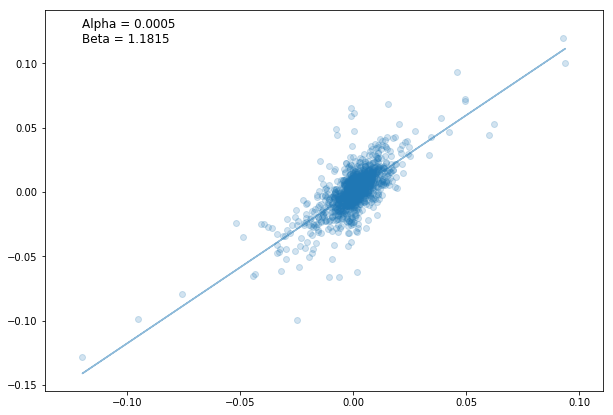

(0.0004993045216310781, 1.1814614595718749)

In [15]:

CAPM_coef("AAPL",start_date='2015-04-01',end_date='2020-04-01',plot_beta=True)